# Week 2 Building Composition - Han Zhang

---

### Summary
This notebook examines how the building composition in the Chicago Energy benchmarking dataset changes over the years.

## Section 1: Data Setup

In [1]:
# Standard library imports
import sys

# Third-party imports
import seaborn as sns

# Add utils folder to Python path
sys.path.append("../utils")

# Local application imports
from plot_utils import plot_bar

from data import merge_all_years

# Load in the data
energy_df = merge_all_years()

energy_df.head()

Reading Chicago_Energy_Benchmarking_-_2014_Data_Reported_in_2015_20251002.csv (Year: 2014)...
Reading Chicago_Energy_Benchmarking_-_2015_Data_Reported_in_2016_20251002.csv (Year: 2015)...
Reading Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017_20251007.csv (Year: 2016)...
Reading Chicago_Energy_Benchmarking_-_2017_Data_Reported_in_2018_20251002.csv (Year: 2017)...
Reading Chicago_Energy_Benchmarking_-_2018_Data_Reported_in_2019_20251002.csv (Year: 2018)...
Reading Chicago_Energy_Benchmarking_-_2019_Data_Reported_in_2020_20251002.csv (Year: 2019)...
Reading Chicago_Energy_Benchmarking_-_2020_Data_Reported_in_2021_20251002.csv (Year: 2020)...
Reading Chicago_Energy_Benchmarking_-_2021_Data_Reported_in_2022_20251002.csv (Year: 2021)...
Reading Chicago_Energy_Benchmarking_-_2022_Data_Reported_in_2023_20251002.csv (Year: 2022)...
Reading Chicago_Energy_Benchmarking_-_2023_Data_Reported_in_2024_20251002.csv (Year: 2023)...
Merged 10 files with 28,329 total rows and 31 columns.
Saved

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Data_Year
0,2014,111290,IIT Research Tower,Submitted,10 West 35th Street,60616,NaN,NaN,DOUGLAS,College/University,...,155.0,NaN,NaN,3887.0,9.89,41.831398,-87.627230,POINT (-87.62723022 41.83139755),2014-111290,2014
1,2014,158438,Realtor Building,Submitted,430 N. Michigan Ave,60611,NaN,NaN,NEAR NORTH SIDE,Office,...,187.0,80.0,184.0,3048.0,11.50,41.890376,-87.624680,POINT (-87.62467983 41.8903758),2014-158438,2014
2,2014,103597,30 North LaSalle Street,Submitted,30 North LaSalle Street,60602,NaN,NaN,LOOP,Office,...,150.0,NaN,NaN,10010.0,9.14,41.882846,-87.632902,POINT (-87.63290243 41.88284628),2014-103597,2014
3,2014,101961,Inland Steel Building,Submitted,30 West Monroe,60603,NaN,NaN,LOOP,Office,...,219.0,114.0,212.0,3898.0,12.95,41.881090,-87.628589,POINT (-87.62858918 41.88108964),2014-101961,2014
4,2014,102365,Lake View Hi-CPS,Submitted,4015 N Ashland Ave,60613,NaN,NaN,LAKE VIEW,K-12 School,...,111.0,60.0,104.0,1709.0,6.42,41.955254,-87.668605,POINT (-87.66860456 41.95525436),2014-102365,2014


## Section 2: Building Counts per Year

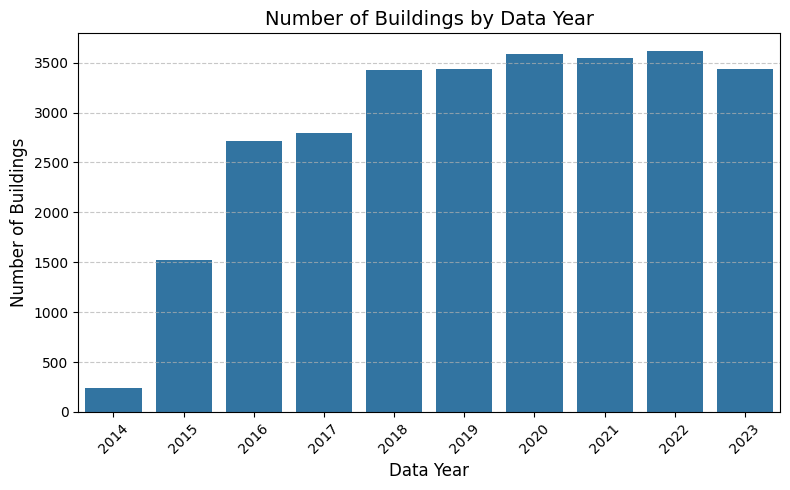

In [2]:
# Count building counts per year
building_counts_df = energy_df["Data Year"].value_counts().sort_index().reset_index()

# Create bar plot
plot_bar(
    data=building_counts_df,
    x="Data Year",
    y="count",
    title="Number of Buildings by Data Year",
    xlabel="Data Year",
    ylabel="Number of Buildings",
)

In [3]:
building_id_col = "ID"

# Find the first year each building appears
first_year = energy_df.groupby(building_id_col)["Data Year"].min().reset_index()

# Count how many buildings have their first appearance each year
new_buildings_per_year = (
    first_year["Data Year"].value_counts().sort_index().reset_index()
)
new_buildings_per_year.columns = ["Data Year", "New Buildings"]

# Check to confirm
print(new_buildings_per_year.head())

   Data Year  New Buildings
0       2014            243
1       2015           1287
2       2016           1253
3       2017            142
4       2018            560


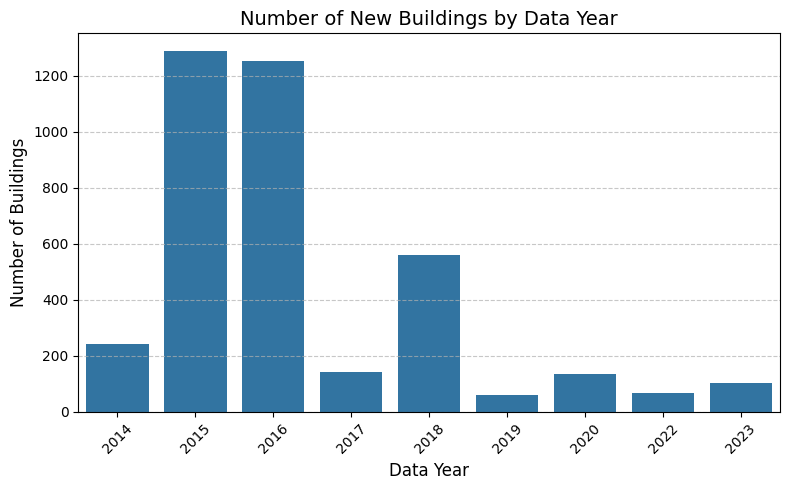

In [4]:
# Plot New Buildings per Year
plot_bar(
    data=new_buildings_per_year,
    x="Data Year",
    y="New Buildings",
    title="Number of New Buildings by Data Year",
    xlabel="Data Year",
    ylabel="Number of Buildings",
)

## Section 3: Building Types

In [5]:
energy_df["First Year"] = energy_df.groupby("ID")["Data Year"].transform("min")
# Filter for new buildings only
new_buildings_df = energy_df[energy_df["Data Year"] == energy_df["First Year"]]

all_property_types = new_buildings_df["Primary Property Type"].unique()

palette = sns.color_palette("hls", n_colors=len(all_property_types))
color_map = dict(zip(all_property_types, palette))

years = sorted(new_buildings_df["Data Year"].unique())

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


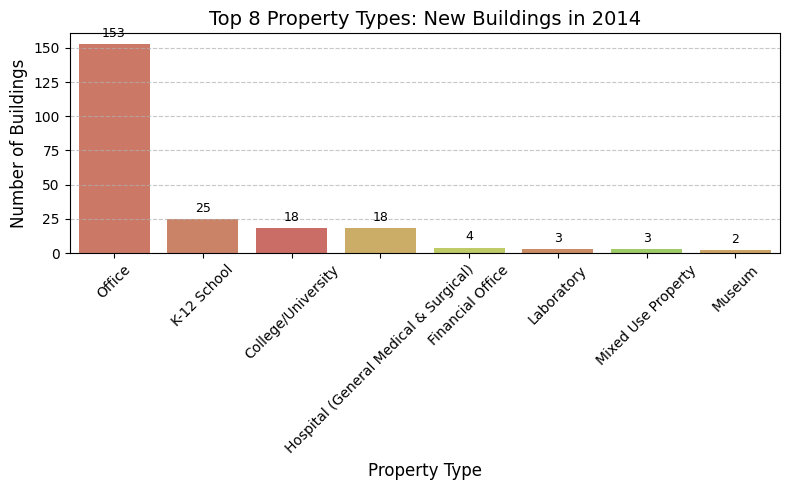

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


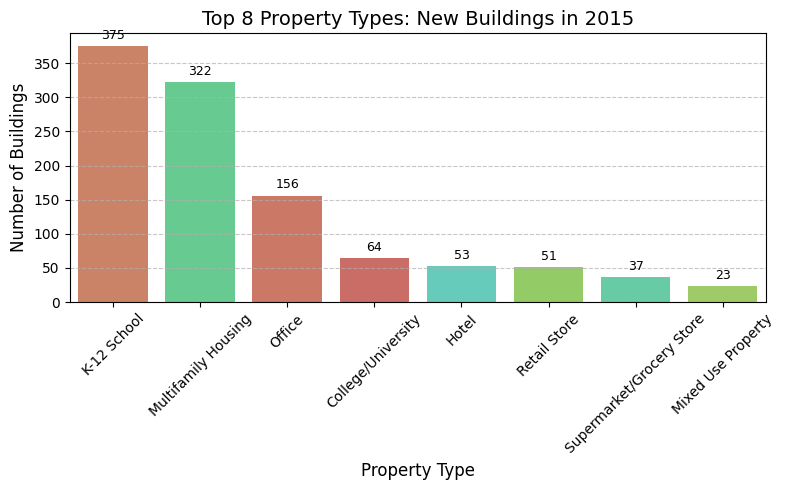

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


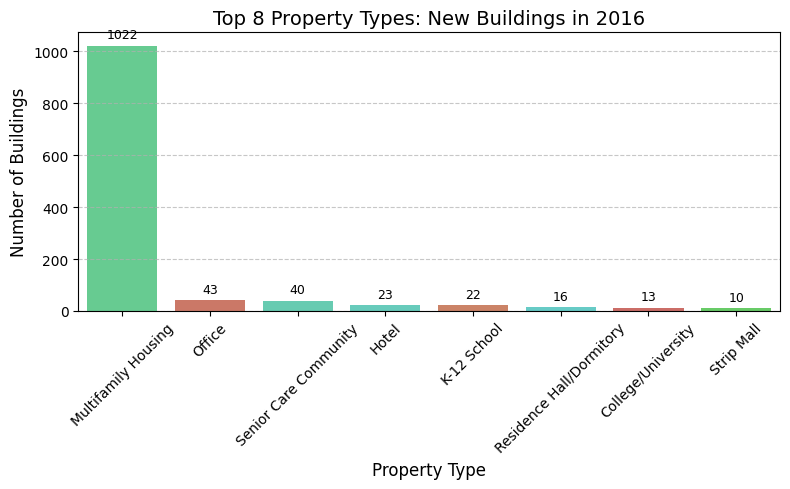

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


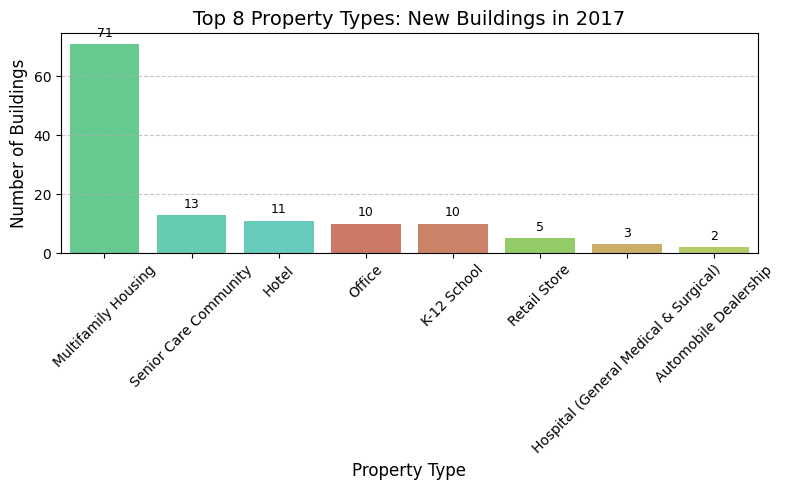

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


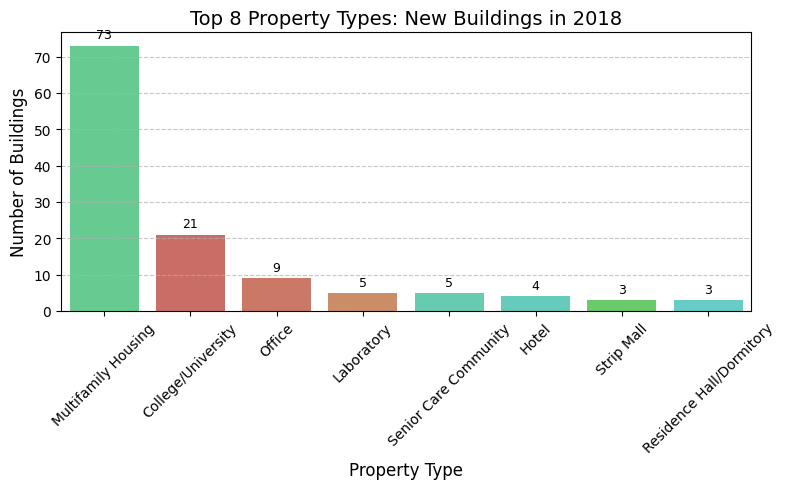

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


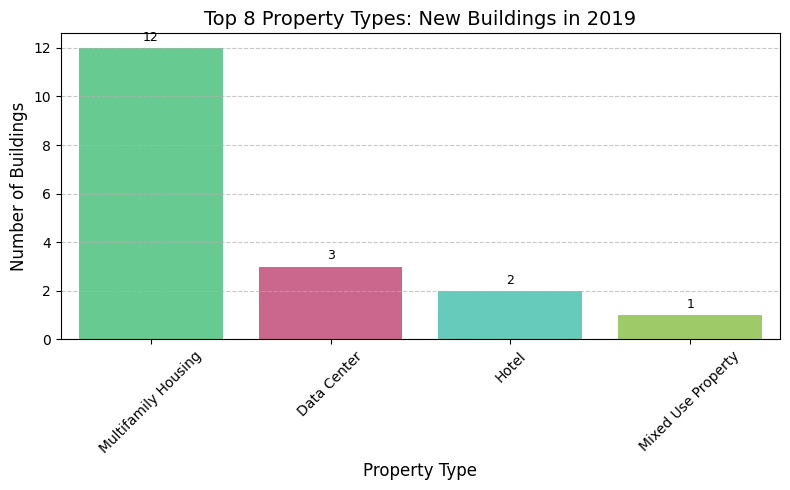

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


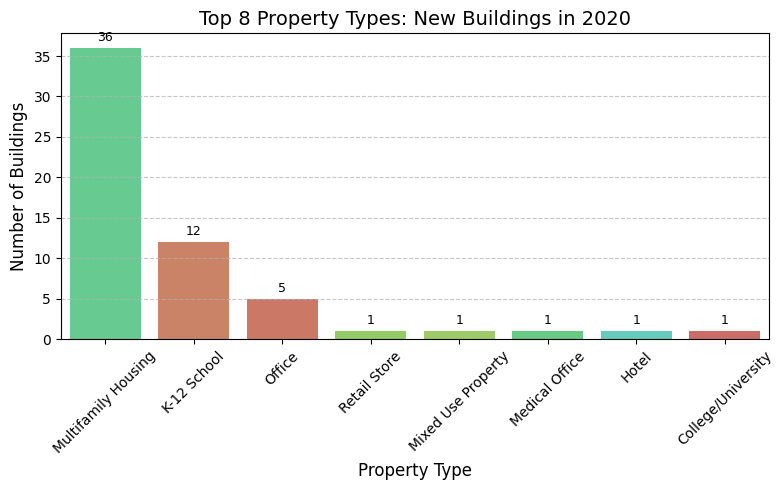

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


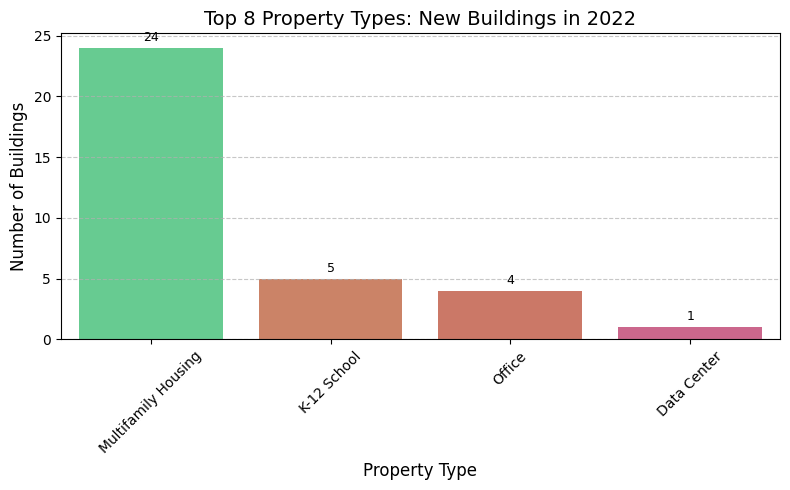

/project/src/notebooks/../utils/plot_utils.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


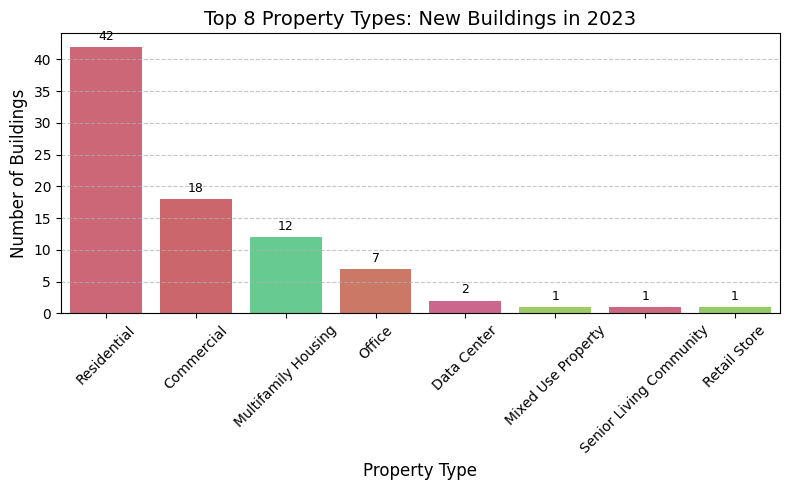

In [6]:
for year in years:
    year_df = new_buildings_df[new_buildings_df["Data Year"] == year]

    top8 = year_df["Primary Property Type"].value_counts().nlargest(8).reset_index()
    top8.columns = ["Primary Property Type", "Number of Buildings"]

    # Map colors specifically to these 8 types
    bar_colors = [color_map[ptype] for ptype in top8["Primary Property Type"]]

    # Plot each year separately
    plot_bar(
        data=top8,
        x="Primary Property Type",
        y="Number of Buildings",
        title=f"Top 8 Property Types: New Buildings in {year}",
        xlabel="Property Type",
        ylabel="Number of Buildings",
        palette=bar_colors,
        rotate_xticks=45,
        show_values=True,
    )

### Next Steps

Looking at the number of buildings by data year, we see that most of the data is added by 2018. However, something that might be worth looking further into are the dips going from 2020-2021 as well as 2022-2023. 

In addition to this, by looking into the top building types being added each year, we see that multi family housing is the most frequent addition to the data, while other types like `Office` and `K-12 schools` are added in mass early on. 